In [23]:
!pip install japanize-matplotlib 

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=08d3c689247465004b208feaa111b660f30877f6b3bbd67d844e4c5c53433233
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [68]:
#日本語フォントのインストール　（wordcloudなどで可視化するため）
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 11 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,364 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [19]:
# 引用先http://www.jnlp.org/SNOW/D18 からダウンロードしたエクセルファイルを
# ドライブに保存して使用
path = '/content/drive/My Drive/Japanese_sentiment/D18-2018.7.24.xlsx'
##
#それぞれのシートは
#感情分類
#作業者A
#作業者B
#作業者C
#とに分けられている
##

sentiment = pd.read_excel(path, sheet_name="感情分類")
data1 = pd.read_excel(path, sheet_name="作業者A").rename(columns={"Word":"Word1","Katakana":"Katakana1", "Emotion":"Emotion1"})
data2 = pd.read_excel(path, sheet_name="作業者B").rename(columns={"Word":"Word2","Katakana":"Katakana2", "Emotion":"Emotion2"})
data3 = pd.read_excel(path, sheet_name="作業者C").rename(columns={"Word":"Word3","Katakana":"Katakana3", "Emotion":"Emotion3"})

sentiment = sentiment.rename(columns = {"Symbol(全て全角)":"Symbol"})
sentiment

,Emotion,Symbol
0,安らぎ,安
1,楽しさ,楽
2,親しみ,親
3,尊敬・尊さ,尊
4,感謝,感
5,気持ちが良い,気
6,誇らしい,誇
7,感動,動
8,喜び,喜
9,悲しさ,悲


In [26]:
data = pd.concat([data1,data2, data3], axis=1)
data

,Word1,Katakana1,Emotion1,Word2,Katakana2,Emotion2,Word3,Katakana3,Emotion3
0,哀,アイ,悲,哀,アイ,悲,哀,アイ,悲
1,愛,アイ,好親安尊,愛,アイ,好親,愛,アイ,好
2,相いれない,アイイレナイ,不,相いれない,アイイレナイ,嫌,相いれない,アイイレナイ,嫌
3,哀感,アイカン,悲,哀感,アイカン,悲寂,哀感,アイカン,悲
4,愛敬,アイキョウ,親,愛敬,アイキョウ,親好,愛敬,アイキョウ,好親
...,...,...,...,...,...,...,...,...,...
1973,悪賢い,ワルガシコイ,不嫌,悪賢い,ワルガシコイ,嫌Ｆ,悪賢い,ワルガシコイ,嫌
1974,悪びれる,ワルビレル,恥,悪びれる,ワルビレル,謝,悪びれる,ワルビレル,謝
1975,我を忘れる,ワレオワスレル,好,我を忘れる,ワレオワスレル,興,我を忘れる,ワレオワスレル,興
1976,わぁ,ワー,驚,わぁ,ワー,動喜,わぁ,ワー,喜


##データ作成者によって感情のアノテーションの違いがあることが直感的に分かる




In [69]:
# 日本語 WordCloud 生成
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 日本語フォント指定

def show_wordcloud(text):
  text = " ".join(text)
  wordcloud = WordCloud(font_path=fpath, background_color='white', width=300, height=300).generate(text)

  
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.figure(figsize=(300,200))
  plt.show()

In [70]:
word_list = []
for c in data.Emotion1.values.tolist():
  word_list.append(c)
words=" ".join(word_list)

0
1
2


AttributeError: ignored

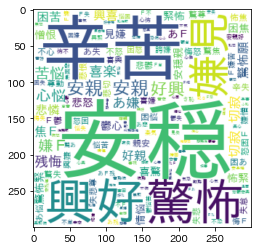

In [93]:
fig.add_subplot(rows, cols, a+1) )
for i, j in enumerate(["Emotion1","Emotion2","Emotion3"]):

  print(i)
  text = data[j].values
  text = " ".join(text)
  wordcloud = WordCloud(font_path=fpath, background_color='white', width=300, height=300).generate(text)
  ax[i] = plt.imshow(wordcloud, interpolation='bilinear')
  #plt.imshow(wordcloud, interpolation='bilinear')
  plt.savefig("wordcloud_{}.png".format(str(i)))


In [101]:
import cv2
fig , ax = plt.subplots(1, 3,figsize = (300,300))

for i in range(3):

  img_path = '/content/wordcloud_{}.png'.format(i)
  img = cv2.imread(img_path)
  ax[i].imshow(img)
  #ax[i].set_title(label=img_id)



#アノテーターによってラベリングが異なる